In [1]:
# !pip install pymoo

In [1]:
import pickle
from fair_loss import FairLoss
from sklearn.metrics import f1_score, balanced_accuracy_score,recall_score
import matplotlib.pyplot as plt
import os
import pandas as pd

# Loading acc

In [2]:
def parse_accuracies(text):
    result = {}
    state_blocks = text.split('model_name ')
    
    for block in state_blocks[1:]:
        lines = block.strip().split('\n')
        state = lines[0].strip()
        subgroup_vals = {}
        
        for i in range(len(lines)):
            if lines[i] in ['WM', 'WW', 'BM', 'BW']:
                numbers = lines[i + 2].split(' : ')
                val_acc = float(numbers[1])
                subgroup_vals[lines[i]] = round(val_acc, 6)
        
        result[state] = subgroup_vals
    
    return result



In [3]:
# Read from file
with open('50_clients_data/subgroup_acc_normal.txt', 'r') as file:
    sub_normal_acc_load = file.read()
with open('50_clients_data/subgroup_acc_dp.txt', 'r') as file:
    sub_dp_acc_load = file.read()
with open('50_clients_data/subgroup_acc_fair.txt', 'r') as file:
    sub_fair_acc_load = file.read()
with open('50_clients_data/subgroup_acc_fairdp.txt', 'r') as file:
    sub_fairdp_acc_load = file.read()



sub_normal_acc = parse_accuracies(sub_normal_acc_load)
sub_dp_acc = parse_accuracies(sub_dp_acc_load)
sub_fair_acc = parse_accuracies(sub_fair_acc_load)
sub_fairdp_acc = parse_accuracies(sub_fairdp_acc_load)


In [4]:
sub_normal_acc

{'AL': {'WM': 0.749052, 'WW': 0.717575, 'BM': 0.701926, 'BW': 0.678266},
 'AK': {'WM': 0.750781, 'WW': 0.67483, 'BM': 0.663852, 'BW': 0.62859},
 'AZ': {'WM': 0.75203, 'WW': 0.70753, 'BM': 0.691259, 'BW': 0.664942},
 'AR': {'WM': 0.747077, 'WW': 0.72702, 'BM': 0.713778, 'BW': 0.691203},
 'CA': {'WM': 0.75126, 'WW': 0.681938, 'BM': 0.667111, 'BW': 0.635446},
 'CO': {'WM': 0.751289, 'WW': 0.685703, 'BM': 0.671111, 'BW': 0.642432},
 'CT': {'WM': 0.75065, 'WW': 0.67246, 'BM': 0.661333, 'BW': 0.625614},
 'DE': {'WM': 0.752713, 'WW': 0.698328, 'BM': 0.68163, 'BW': 0.65718},
 'FL': {'WM': 0.751754, 'WW': 0.71123, 'BM': 0.694074, 'BW': 0.669987},
 'GA': {'WM': 0.752277, 'WW': 0.701834, 'BM': 0.687556, 'BW': 0.660285},
 'HI': {'WM': 0.750113, 'WW': 0.682765, 'BM': 0.670074, 'BW': 0.639457},
 'ID': {'WM': 0.748166, 'WW': 0.724943, 'BM': 0.710074, 'BW': 0.687969},
 'IL': {'WM': 0.752204, 'WW': 0.687066, 'BM': 0.672889, 'BW': 0.644373},
 'IN': {'WM': 0.749793, 'WW': 0.720497, 'BM': 0.704148, 'BW': 

In [5]:
all_state_recon_normal={'AL': 67.72272727272728,
 'AK': 68.45454545454545,
 'AZ': 70.29545454545455,
 'AR': 73.08181818181818,
 'CA': 68.98636363636363,
 'CO': 70.09545454545454,
 'CT': 66.50909090909092,
 'DE': 68.28636363636365,
 'FL': 70.38181818181819,
 'GA': 67.97272727272727,
 'HI': 67.2090909090909,
 'ID': 72.22727272727273,
 'IL': 70.42727272727274,
 'IN': 70.08636363636364,
 'IA': 69.10454545454546,
 'KS': 70.13181818181819,
 'KY': 70.23181818181818,
 'LA': 70.37727272727274,
 'ME': 70.01818181818183,
 'MD': 67.28636363636365,
 'MA': 68.40454545454546,
 'MI': 68.85000000000001,
 'MN': 69.96818181818183,
 'MS': 68.61363636363636,
 'MO': 70.95454545454545,
 'MT': 70.30454545454546,
 'NE': 70.21363636363637,
 'NV': 71.48181818181818,
 'NH': 71.59545454545454,
 'NJ': 64.71818181818183,
 'NM': 72.11363636363637,
 'NY': 67.11818181818184,
 'NC': 69.66818181818182,
 'ND': 69.9318181818182,
 'OH': 68.93181818181819,
 'OK': 68.71818181818182,
 'OR': 69.90454545454547,
 'PA': 69.18636363636365,
 'RI': 70.27272727272728,
 'SC': 68.82272727272728,
 'SD': 70.43636363636364,
 'TN': 69.00909090909092,
 'TX': 71.01363636363637,
 'UT': 70.16818181818184,
 'VT': 70.2818181818182,
 'VA': 69.66363636363637,
 'WA': 68.64090909090909,
 'WV': 69.4409090909091,
 'WI': 70.39090909090909,
 'WY': 71.7}

In [6]:
all_state_recon_dp={'AL': 60.20454545454545,
 'AK': 62.404545454545456,
 'AZ': 64.08636363636364,
 'AR': 62.80000000000001,
 'CA': 58.750000000000014,
 'CO': 64.43181818181817,
 'CT': 60.62727272727273,
 'DE': 63.19545454545455,
 'FL': 64.40909090909092,
 'GA': 61.795454545454554,
 'HI': 59.818181818181834,
 'ID': 63.76363636363638,
 'IL': 65.62272727272729,
 'IN': 58.936363636363645,
 'IA': 63.21363636363637,
 'KS': 61.88636363636364,
 'KY': 62.477272727272734,
 'LA': 64.06363636363636,
 'ME': 63.09545454545456,
 'MD': 50.82727272727274,
 'MA': 49.395454545454555,
 'MI': 61.62727272727273,
 'MN': 63.93181818181819,
 'MS': 59.58181818181819,
 'MO': 61.76363636363638,
 'MT': 62.313636363636384,
 'NE': 63.84545454545455,
 'NV': 64.90909090909092,
 'NH': 64.63636363636365,
 'NJ': 56.72272727272728,
 'NM': 66.33636363636364,
 'NY': 62.3409090909091,
 'NC': 61.977272727272734,
 'ND': 64.54545454545455,
 'OH': 60.90454545454547,
 'OK': 58.93636363636365,
 'OR': 65.23181818181818,
 'PA': 62.209090909090925,
 'RI': 62.66818181818182,
 'SC': 60.20454545454545,
 'SD': 60.45,
 'TN': 60.754545454545465,
 'TX': 65.47272727272728,
 'UT': 64.19545454545454,
 'VT': 63.70000000000001,
 'VA': 61.822727272727285,
 'WA': 60.27272727272729,
 'WV': 60.3909090909091,
 'WI': 64.32272727272728,
 'WY': 65.91363636363637}

In [7]:
all_state_recon_fair={'AL': 61.06363636363636,
 'AK': 56.85909090909092,
 'AZ': 61.06363636363638,
 'AR': 62.21363636363637,
 'CA': 61.804545454545455,
 'CO': 61.4318181818182,
 'CT': 49.26363636363638,
 'DE': 63.663636363636364,
 'FL': 65.30454545454546,
 'GA': 64.52272727272728,
 'HI': 55.168181818181814,
 'ID': 67.8409090909091,
 'IL': 64.70000000000002,
 'IN': 61.02272727272727,
 'IA': 63.71818181818183,
 'KS': 55.327272727272735,
 'KY': 64.20909090909092,
 'LA': 63.86363636363637,
 'ME': 70.14545454545456,
 'MD': 61.136363636363654,
 'MA': 60.136363636363654,
 'MI': 64.77727272727275,
 'MN': 54.88181818181819,
 'MS': 64.58636363636364,
 'MO': 63.62272727272729,
 'MT': 69.35454545454547,
 'NE': 64.34545454545454,
 'NV': 66.13636363636364,
 'NH': 67.62272727272727,
 'NJ': 62.60909090909092,
 'NM': 56.37272727272729,
 'NY': 56.10454545454546,
 'NC': 63.95454545454547,
 'ND': 66.2,
 'OH': 61.9909090909091,
 'OK': 63.036363636363646,
 'OR': 64.4909090909091,
 'PA': 60.08181818181819,
 'RI': 60.66363636363638,
 'SC': 63.690909090909095,
 'SD': 63.854545454545466,
 'TN': 62.445454545454545,
 'TX': 65.25909090909092,
 'UT': 67.54090909090911,
 'VT': 66.97727272727275,
 'VA': 62.01363636363637,
 'WA': 64.34545454545454,
 'WV': 61.53636363636365,
 'WI': 52.31363636363638,
 'WY': 67.11363636363636}

In [8]:
all_state_recon_fairdp={'AL': 55.23636363636365,
 'AK': 57.40454545454546,
 'AZ': 60.068181818181834,
 'AR': 54.622727272727275,
 'CA': 64.68636363636364,
 'CO': 63.08181818181819,
 'CT': 61.16363636363638,
 'DE': 62.55454545454546,
 'FL': 59.70454545454547,
 'GA': 61.20000000000001,
 'HI': 59.822727272727285,
 'ID': 64.2409090909091,
 'IL': 51.509090909090915,
 'IN': 51.58636363636364,
 'IA': 53.32272727272729,
 'KS': 61.863636363636374,
 'KY': 52.77272727272728,
 'LA': 58.01818181818182,
 'ME': 52.713636363636375,
 'MD': 60.872727272727275,
 'MA': 50.9909090909091,
 'MI': 56.172727272727286,
 'MN': 51.5090909090909,
 'MS': 54.17727272727273,
 'MO': 51.20909090909092,
 'MT': 64.26363636363637,
 'NE': 55.9818181818182,
 'NV': 54.70454545454546,
 'NH': 56.145454545454555,
 'NJ': 50.80909090909091,
 'NM': 59.82727272727273,
 'NY': 61.736363636363656,
 'NC': 56.959090909090925,
 'ND': 63.19545454545455,
 'OH': 54.37272727272728,
 'OK': 53.113636363636374,
 'OR': 65.02727272727273,
 'PA': 51.87272727272729,
 'RI': 59.122727272727296,
 'SC': 55.07727272727274,
 'SD': 52.10909090909092,
 'TN': 52.58181818181819,
 'TX': 64.39545454545456,
 'UT': 59.58181818181819,
 'VT': 54.0409090909091,
 'VA': 61.4318181818182,
 'WA': 51.82727272727274,
 'WV': 56.45000000000001,
 'WI': 54.009090909090915,
 'WY': 54.504545454545465}

In [9]:
all_state_normal_acc={'AL': 0.7537581473997278,
 'AK': 0.7306486139676562,
 'AZ': 0.7493688950716851,
 'AR': 0.7566363456476246,
 'CA': 0.7341744068213298,
 'CO': 0.7363870217244005,
 'CT': 0.728172164225195,
 'DE': 0.7438643409225825,
 'FL': 0.7514795737868094,
 'GA': 0.7457471622764149,
 'HI': 0.7347680352099586,
 'ID': 0.7565464019523778,
 'IL': 0.7378680945727975,
 'IN': 0.7553231676970217,
 'IA': 0.7549334116842856,
 'KS': 0.7551372840601783,
 'KY': 0.7537701398924274,
 'LA': 0.7522410970732322,
 'ME': 0.7559407810710496,
 'MD': 0.7264092677983582,
 'MA': 0.726972914955238,
 'MI': 0.7520672059290884,
 'MN': 0.7474321075007045,
 'MS': 0.7564684507498306,
 'MO': 0.7531045565476012,
 'MT': 0.756120668461543,
 'NE': 0.7529186729107579,
 'NV': 0.7469104340682733,
 'NH': 0.7455253011614729,
 'NJ': 0.7253359397017467,
 'NM': 0.7507180505003868,
 'NY': 0.7370406125765271,
 'NC': 0.7504182381828975,
 'ND': 0.7474261112543548,
 'OH': 0.7524809469272236,
 'OK': 0.7565583944450773,
 'OR': 0.7478698334842389,
 'PA': 0.7511197990058224,
 'RI': 0.7358353670602203,
 'SC': 0.7550953103357299,
 'SD': 0.7573379064705494,
 'TN': 0.7543637682810561,
 'TX': 0.746832482865726,
 'UT': 0.7526488418250176,
 'VT': 0.7533444064015926,
 'VA': 0.7372804624305185,
 'WA': 0.7347080727464607,
 'WV': 0.7575117976146932,
 'WI': 0.7521991233487837,
 'WY': 0.7491110564786444}

In [10]:
all_state_dp_acc={'AL': 0.7539260422975218,
 'AK': 0.7290775974240126,
 'AZ': 0.7485953792925628,
 'AR': 0.7574578313975452,
 'CA': 0.7343902716899221,
 'CO': 0.7358533557992697,
 'CT': 0.7284359990645856,
 'DE': 0.7433606562292006,
 'FL': 0.7519712659874919,
 'GA': 0.7452254888439837,
 'HI': 0.7341084481114822,
 'ID': 0.7570081129213112,
 'IL': 0.7376402372115056,
 'IN': 0.7554490888703671,
 'IA': 0.7549693891623843,
 'KS': 0.7554670776094166,
 'KY': 0.7544896894544015,
 'LA': 0.7526068681005691,
 'ME': 0.7554970588411655,
 'MD': 0.7262053954224655,
 'MA': 0.7266970876231479,
 'MI': 0.7521391608852858,
 'MN': 0.7477379160645437,
 'MS': 0.75704409039941,
 'MO': 0.7530326015914037,
 'MT': 0.7563845033009337,
 'NE': 0.7530685790695025,
 'NV': 0.7464966930701381,
 'NH': 0.7456692110738677,
 'NJ': 0.7253659209334956,
 'NM': 0.749872579765067,
 'NY': 0.735817378321171,
 'NC': 0.7507180505003868,
 'ND': 0.7474680849788032,
 'OH': 0.7533084289234939,
 'OK': 0.7573678877022983,
 'OR': 0.7484334806411187,
 'PA': 0.7513836338452129,
 'RI': 0.7350918325128469,
 'SC': 0.7552332240017748,
 'SD': 0.7574398426584957,
 'TN': 0.7544717007153522,
 'TX': 0.7454713349443248,
 'UT': 0.7526068681005691,
 'VT': 0.7539680160219703,
 'VA': 0.7364589766805979,
 'WA': 0.7338506095184415,
 'WV': 0.7570740716311589,
 'WI': 0.752414988217376,
 'WY': 0.7501004371263589}

In [11]:
all_state_fair_acc={'AL': 0.7567023043574722,
 'AK': 0.7259535530757746,
 'AZ': 0.7503462832267,
 'AR': 0.7512277314401185,
 'CA': 0.7246223863861223,
 'CO': 0.7258636093805277,
 'CT': 0.7120302690515737,
 'DE': 0.7486193642779619,
 'FL': 0.7506940655149876,
 'GA': 0.7443020669061168,
 'HI': 0.7332389923907634,
 'ID': 0.7561266647078928,
 'IL': 0.7324774691043406,
 'IN': 0.7521691421170348,
 'IA': 0.7539800085146698,
 'KS': 0.7568042405454186,
 'KY': 0.7570081129213112,
 'LA': 0.7475820136594492,
 'ME': 0.7581953696985687,
 'MD': 0.7311702874000875,
 'MA': 0.7220320079630151,
 'MI': 0.7517014349017515,
 'MN': 0.7362431118120056,
 'MS': 0.7572419665289529,
 'MO': 0.7505681443416421,
 'MT': 0.7539860047610196,
 'NE': 0.7480377283820329,
 'NV': 0.7495367899694791,
 'NH': 0.7412799587458251,
 'NJ': 0.7166293900018589,
 'NM': 0.7477798897889921,
 'NY': 0.7323335591919459,
 'NC': 0.750406245690198,
 'ND': 0.7490450977687967,
 'OH': 0.7535242937920862,
 'OK': 0.7528287292155111,
 'OR': 0.7427250541161233,
 'PA': 0.7455312974078228,
 'RI': 0.722955429900882,
 'SC': 0.7553171714506719,
 'SD': 0.7490750790005457,
 'TN': 0.7546156106277471,
 'TX': 0.744937669019194,
 'UT': 0.7537041811825798,
 'VT': 0.7561686384323414,
 'VA': 0.7356554796697268,
 'WA': 0.7319138219474609,
 'WV': 0.7578116099321824,
 'WI': 0.7383837717588789,
 'WY': 0.7443740218623142}

In [12]:
all_state_fairdp_acc={'AL': 0.7549394079306354,
 'AK': 0.7313681635296304,
 'AZ': 0.7470303589952689,
 'AR': 0.754699558076644,
 'CA': 0.733526812215553,
 'CO': 0.7390073813792566,
 'CT': 0.730600643996858,
 'DE': 0.7442780819207176,
 'FL': 0.7515635212357065,
 'GA': 0.7471862614003634,
 'HI': 0.7400147507660205,
 'ID': 0.7583332833646137,
 'IL': 0.732831247638978,
 'IN': 0.7509399116153288,
 'IA': 0.7433546599828508,
 'KS': 0.7617271587985921,
 'KY': 0.7493389138399362,
 'LA': 0.7487452854513075,
 'ME': 0.745465338697975,
 'MD': 0.7365009504050465,
 'MA': 0.7196994681329488,
 'MI': 0.7546935618302942,
 'MN': 0.7288317513236714,
 'MS': 0.7532304777209466,
 'MO': 0.7488172404075049,
 'MT': 0.7582793171474657,
 'NE': 0.7539440310365711,
 'NV': 0.739666968477733,
 'NH': 0.7409921389210354,
 'NJ': 0.7241426866781395,
 'NM': 0.751995250972891,
 'NY': 0.7366988265345894,
 'NC': 0.748367521931271,
 'ND': 0.7521511533779853,
 'OH': 0.7492429738983396,
 'OK': 0.7568282255308177,
 'OR': 0.7512337276864682,
 'PA': 0.7453873874954279,
 'RI': 0.727614513314665,
 'SC': 0.7527987479837621,
 'SD': 0.7373704061257653,
 'TN': 0.7469284228073226,
 'TX': 0.7405963866619496,
 'UT': 0.7535902525019338,
 'VT': 0.7413039437312242,
 'VA': 0.7356614759160766,
 'WA': 0.7179485641988116,
 'WV': 0.7535722637628844,
 'WI': 0.7496567148964748,
 'WY': 0.7394271186237416}

# loading subgroup Fairness

In [13]:

normal_train = "inversion_subgroup_normal_fairness.pickle"
dp_train = "inversion_subgroup_dp_fairness.pickle"
fair_train = "inversion_subgroup_fair_fairness.pickle"
fairDP_train = "inversion_subgroup_fairDp_fairness.pickle"

with open(normal_train, 'rb') as file:
    normal_train_loaded = pickle.load(file)
with open(dp_train, 'rb') as file:
    dp_train_loaded = pickle.load(file)
with open(fair_train, 'rb') as file:
    fair_train_loaded = pickle.load(file)
with open(fairDP_train, 'rb') as file:
    fairdp_train_loaded = pickle.load(file)




In [14]:
import pandas as pd

def subgroup_calculate_state_ratios(data):
    state_names = []
    ratios_list = []
    denominator_list = []
    ratios_dict = {}

    for state, values in data.items():
        # Find maximum value and its key
        max_value = max(values, key=values.get)
        max_value_amount = values[max_value]

        # Calculate ratios, including self-ratio
        ratios = {}
        for key, value in values.items():
            ratios[key + '/' + max_value] = value / max_value_amount

        # Append state data
        state_names.append(state)
        denominator_list.append(max_value)
        ratios_list.append(ratios)
        ratios_dict[state] = ratios  # Store in dictionary

    # Create DataFrame with ratios
    df_final = pd.DataFrame(ratios_list).fillna("")

    # Add state column
    df_final.insert(0, 'State', state_names)

    # Reset index to make sure it's numeric
    df_final = df_final.reset_index(drop=True)

    return df_final, ratios_dict

In [15]:
normal_sub_df,normal_sub_dic=subgroup_calculate_state_ratios(normal_train_loaded)
dp_sub_df,dp_sub_dic=subgroup_calculate_state_ratios(dp_train_loaded)
fair_sub_df,fair_sub_dic=subgroup_calculate_state_ratios(fair_train_loaded)
fairdp_sub_df,fairdp_sub_dic=subgroup_calculate_state_ratios(fairdp_train_loaded)

In [16]:
normal_sub_dic

{'AL': {'WM/WM': 1.0,
  'WW/WM': 0.8881926864473416,
  'BM/WM': 0.8622689723131592,
  'BW/WM': 0.8282502666385645},
 'AK': {'WM/WM': 1.0,
  'WW/WM': 0.8524139593410395,
  'BM/WM': 0.8541351635841099,
  'BW/WM': 0.8116443857285682},
 'AZ': {'WM/WM': 1.0,
  'WW/WM': 0.8771793830800488,
  'BM/WM': 0.8583460913739596,
  'BW/WM': 0.8226899127918602},
 'AR': {'WM/WM': 1.0,
  'WW/WM': 0.8955103202569997,
  'BM/WM': 0.866415757006992,
  'BW/WM': 0.8349078222419088},
 'CA': {'WM/WM': 1.0,
  'WW/WM': 0.8557673501307844,
  'BM/WM': 0.8508795756406614,
  'BW/WM': 0.812887233040614},
 'CO': {'WM/WM': 1.0,
  'WW/WM': 0.8598673720430569,
  'BM/WM': 0.853307270541106,
  'BW/WM': 0.8177842206003413},
 'CT': {'WM/WM': 1.0,
  'WW/WM': 0.849750895775985,
  'BM/WM': 0.8518750182084757,
  'BW/WM': 0.8100060900574866},
 'DE': {'WM/WM': 1.0,
  'WW/WM': 0.8693013270271741,
  'BM/WM': 0.8535819391610793,
  'BW/WM': 0.8222981956902349},
 'FL': {'WM/WM': 1.0,
  'WW/WM': 0.8803328399523727,
  'BM/WM': 0.8587543033

In [17]:
def calculate_worst_case_fairness(data):

    worst_case_fairness = {}

    for state, groups in data.items():
        fairness_values = list(groups.values())
        max_disparity = min(
            x1 / x2 for i, x1 in enumerate(fairness_values) for x2 in fairness_values[i + 1 :]
        )
        worst_case_fairness[state] = max_disparity

    return worst_case_fairness


In [18]:
worst_case_fairness_normal = calculate_worst_case_fairness(normal_sub_dic)
worst_case_fairness_dp = calculate_worst_case_fairness(dp_sub_dic)
worst_case_fairness_fair = calculate_worst_case_fairness(fair_sub_dic)
worst_case_fairness_fairdp = calculate_worst_case_fairness(fairdp_sub_dic)


In [19]:
worst_case_fairness_normal

{'AL': 1.0300645331869456,
 'AK': 0.9979848572960655,
 'AZ': 1.0219413729442663,
 'AR': 1.0335803717957692,
 'CA': 1.0057443786759634,
 'CO': 1.0076878537526006,
 'CT': 0.997506532781114,
 'DE': 1.0184157924915143,
 'FL': 1.0251277187490582,
 'GA': 1.0162867620470586,
 'HI': 1.0046370517119818,
 'ID': 1.0330883630701344,
 'IL': 1.007002543188592,
 'IN': 1.032510715930803,
 'IA': 1.0314387847322373,
 'KS': 1.0335225465273403,
 'KY': 1.0291829252437135,
 'LA': 1.0267528945316322,
 'ME': 1.0352418328446724,
 'MD': 0.9930491196464398,
 'MA': 0.9984653268553301,
 'MI': 1.0268505182700878,
 'MN': 1.0193908948841666,
 'MS': 1.0331477566946534,
 'MO': 1.029875883034158,
 'MT': 1.0342599276921873,
 'NE': 1.0274044890788474,
 'NV': 1.017497245949093,
 'NH': 1.0188846791750759,
 'NJ': 0.9919236005585996,
 'NM': 1.02275951167941,
 'NY': 1.0109372805049974,
 'NC': 1.0241876027658732,
 'ND': 1.0215501759302217,
 'OH': 1.0292683477867353,
 'OK': 1.0340957718441322,
 'OR': 1.0197848391149087,
 'PA': 1

# loading Reconstruction 

In [20]:

state_inversion_normal = "inversion_normal_all_states_reconstruction.pickle"
state_inversion_dp = "inversion_dp_all_states_reconstruction.pickle"
state_inversion_fair = "inversion_fair_all_states_reconstruction.pickle"
state_inversion_fairdp = "inversion_fairDP_all_states_reconstruction.pickle"


inversion_normal_subgroup = "inversion_normal_subgroup_reconstruction.pickle"
inversion_dp_subgroup = "inversion_dp_subgroup_reconstruction.pickle"
inversion_fair_subgroup = "inversion_fair_subgroup_reconstruction.pickle"
inversion_fairdp_subgroup = "inversion_fairDP_subgroup_reconstruction.pickle"



with open(state_inversion_normal, 'rb') as file:
    inversion_normal_state_reconstruction = pickle.load(file)
with open(inversion_normal_subgroup, 'rb') as file:
    inversion_normal_subgroup_reconstruction = pickle.load(file)


with open(state_inversion_dp, 'rb') as file:
    inversion_dp_state_reconstruction = pickle.load(file)    
with open(inversion_dp_subgroup, 'rb') as file:
    inversion_dp_subgroup_reconstruction = pickle.load(file)


with open(state_inversion_fair, 'rb') as file:
    inversion_fair_state_reconstruction = pickle.load(file)    
with open(inversion_fair_subgroup, 'rb') as file:
    inversion_fair_subgroup_reconstruction = pickle.load(file)


with open(state_inversion_fairdp, 'rb') as file:
    inversion_fairdp_state_reconstruction = pickle.load(file)    
with open(inversion_fairdp_subgroup, 'rb') as file:
    inversion_fairdp_subgroup_reconstruction = pickle.load(file)


inversion_normal_all = pd.DataFrame(list(inversion_normal_state_reconstruction.items()), columns=['State', 'Value'])
inversion_dp_all = pd.DataFrame(list(inversion_dp_state_reconstruction.items()), columns=['State', 'Value'])
inversion_fair_all = pd.DataFrame(list(inversion_fair_state_reconstruction.items()), columns=['State', 'Value'])
inversion_fairdp_all = pd.DataFrame(list(inversion_fairdp_state_reconstruction.items()), columns=['State', 'Value'])

df_inversion_normal_subgroup_reconstruction = pd.DataFrame(inversion_normal_subgroup_reconstruction).T
df_inversion_normal_subgroup_reconstruction.index.name = 'State'
df_inversion_normal_subgroup_reconstruction.reset_index(inplace=True)

df_inversion_dp_subgroup_reconstruction = pd.DataFrame(inversion_dp_subgroup_reconstruction).T
df_inversion_dp_subgroup_reconstruction.index.name = 'State'
df_inversion_dp_subgroup_reconstruction.reset_index(inplace=True)

df_inversion_fair_subgroup_reconstruction = pd.DataFrame(inversion_fair_subgroup_reconstruction).T
df_inversion_fair_subgroup_reconstruction.index.name = 'State'
df_inversion_fair_subgroup_reconstruction.reset_index(inplace=True)


df_inversion_fairdp_subgroup_reconstruction = pd.DataFrame(inversion_fairdp_subgroup_reconstruction).T
df_inversion_fairdp_subgroup_reconstruction.index.name = 'State'
df_inversion_fairdp_subgroup_reconstruction.reset_index(inplace=True)




In [21]:
inversion_normal_state_reconstruction

{'AL': 67.72272727272728,
 'AK': 68.45454545454545,
 'AZ': 70.29545454545455,
 'AR': 73.08181818181818,
 'CA': 68.98636363636363,
 'CO': 70.09545454545454,
 'CT': 66.50909090909092,
 'DE': 68.28636363636365,
 'FL': 70.38181818181819,
 'GA': 67.97272727272727,
 'HI': 67.2090909090909,
 'ID': 72.22727272727273,
 'IL': 70.42727272727274,
 'IN': 70.08636363636364,
 'IA': 69.10454545454546,
 'KS': 70.13181818181819,
 'KY': 70.23181818181818,
 'LA': 70.37727272727274,
 'ME': 70.01818181818183,
 'MD': 67.28636363636365,
 'MA': 68.40454545454546,
 'MI': 68.85000000000001,
 'MN': 69.96818181818183,
 'MS': 68.61363636363636,
 'MO': 70.95454545454545,
 'MT': 70.30454545454546,
 'NE': 70.21363636363637,
 'NV': 71.48181818181818,
 'NH': 71.59545454545454,
 'NJ': 64.71818181818183,
 'NM': 72.11363636363637,
 'NY': 67.11818181818184,
 'NC': 69.66818181818182,
 'ND': 69.9318181818182,
 'OH': 68.93181818181819,
 'OK': 68.71818181818182,
 'OR': 69.90454545454547,
 'PA': 69.18636363636365,
 'RI': 70.2727

In [22]:
# inversion_normal_subgroup_reconstruction

In [23]:
# worst_case_fairness_fairdp

In [24]:
# sub_normal_acc

In [25]:
worst_case_fairness_normal

{'AL': 1.0300645331869456,
 'AK': 0.9979848572960655,
 'AZ': 1.0219413729442663,
 'AR': 1.0335803717957692,
 'CA': 1.0057443786759634,
 'CO': 1.0076878537526006,
 'CT': 0.997506532781114,
 'DE': 1.0184157924915143,
 'FL': 1.0251277187490582,
 'GA': 1.0162867620470586,
 'HI': 1.0046370517119818,
 'ID': 1.0330883630701344,
 'IL': 1.007002543188592,
 'IN': 1.032510715930803,
 'IA': 1.0314387847322373,
 'KS': 1.0335225465273403,
 'KY': 1.0291829252437135,
 'LA': 1.0267528945316322,
 'ME': 1.0352418328446724,
 'MD': 0.9930491196464398,
 'MA': 0.9984653268553301,
 'MI': 1.0268505182700878,
 'MN': 1.0193908948841666,
 'MS': 1.0331477566946534,
 'MO': 1.029875883034158,
 'MT': 1.0342599276921873,
 'NE': 1.0274044890788474,
 'NV': 1.017497245949093,
 'NH': 1.0188846791750759,
 'NJ': 0.9919236005585996,
 'NM': 1.02275951167941,
 'NY': 1.0109372805049974,
 'NC': 1.0241876027658732,
 'ND': 1.0215501759302217,
 'OH': 1.0292683477867353,
 'OK': 1.0340957718441322,
 'OR': 1.0197848391149087,
 'PA': 1

In [26]:
all_state_recon_normal

{'AL': 67.72272727272728,
 'AK': 68.45454545454545,
 'AZ': 70.29545454545455,
 'AR': 73.08181818181818,
 'CA': 68.98636363636363,
 'CO': 70.09545454545454,
 'CT': 66.50909090909092,
 'DE': 68.28636363636365,
 'FL': 70.38181818181819,
 'GA': 67.97272727272727,
 'HI': 67.2090909090909,
 'ID': 72.22727272727273,
 'IL': 70.42727272727274,
 'IN': 70.08636363636364,
 'IA': 69.10454545454546,
 'KS': 70.13181818181819,
 'KY': 70.23181818181818,
 'LA': 70.37727272727274,
 'ME': 70.01818181818183,
 'MD': 67.28636363636365,
 'MA': 68.40454545454546,
 'MI': 68.85000000000001,
 'MN': 69.96818181818183,
 'MS': 68.61363636363636,
 'MO': 70.95454545454545,
 'MT': 70.30454545454546,
 'NE': 70.21363636363637,
 'NV': 71.48181818181818,
 'NH': 71.59545454545454,
 'NJ': 64.71818181818183,
 'NM': 72.11363636363637,
 'NY': 67.11818181818184,
 'NC': 69.66818181818182,
 'ND': 69.9318181818182,
 'OH': 68.93181818181819,
 'OK': 68.71818181818182,
 'OR': 69.90454545454547,
 'PA': 69.18636363636365,
 'RI': 70.2727

In [27]:
data_info=pd.read_csv("50_clients_data/state_sex_race_counts.csv")
data_info.head()

,State,Male_Count,Female_Count,White_Count,Black_Count
0,AL,1038,962,1588,412
1,AK,1129,871,1932,68
2,AZ,1052,948,1912,88
3,AR,1026,974,1807,193
4,CA,1070,930,1856,144


In [28]:
data_info["B_to_W_Ratio"] = data_info["Black_Count"] / data_info["White_Count"]
data_info["F_to_M_Ratio"] = data_info["Female_Count"] / data_info["Male_Count"]
data_info[["State", "B_to_W_Ratio"]]

,State,B_to_W_Ratio
0,AL,0.259446
1,AK,0.035197
2,AZ,0.046025
3,AR,0.106807
4,CA,0.077586
5,CO,0.033592
6,CT,0.099505
7,DE,0.194743
8,FL,0.139601
9,GA,0.357773


In [29]:
data_info

,State,Male_Count,Female_Count,White_Count,Black_Count,B_to_W_Ratio,F_to_M_Ratio
0,AL,1038,962,1588,412,0.259446,0.926782
1,AK,1129,871,1932,68,0.035197,0.771479
2,AZ,1052,948,1912,88,0.046025,0.901141
3,AR,1026,974,1807,193,0.106807,0.949318
4,CA,1070,930,1856,144,0.077586,0.869159
5,CO,1064,936,1935,65,0.033592,0.879699
6,CT,1013,987,1819,181,0.099505,0.974334
7,DE,1004,996,1674,326,0.194743,0.992032
8,FL,1025,975,1755,245,0.139601,0.951220
9,GA,1037,963,1473,527,0.357773,0.928640


In [30]:
data_dict = data_info[["State", "B_to_W_Ratio"]].set_index("State").to_dict()["B_to_W_Ratio"]
# data_dict = data_info[["State", "F_to_M_Ratio"]].set_index("State").to_dict()["F_to_M_Ratio"]
data_dict

{'AL': 0.2594458438287154,
 'AK': 0.035196687370600416,
 'AZ': 0.04602510460251046,
 'AR': 0.10680686220254565,
 'CA': 0.07758620689655173,
 'CO': 0.03359173126614987,
 'CT': 0.09950522264980759,
 'DE': 0.19474313022700118,
 'FL': 0.1396011396011396,
 'GA': 0.3577732518669382,
 'HI': 0.07816711590296496,
 'ID': 0.005530417295123178,
 'IL': 0.10987791342952276,
 'IN': 0.0828370330265295,
 'IA': 0.021450459652706845,
 'KS': 0.044386422976501305,
 'KY': 0.06269925611052073,
 'LA': 0.34861766689143625,
 'ME': 0.013171225937183385,
 'MD': 0.3651877133105802,
 'MA': 0.06382978723404255,
 'MI': 0.09529025191675794,
 'MN': 0.029336078229541946,
 'MS': 0.45454545454545453,
 'MO': 0.07933081489476525,
 'MT': 0.004016064257028112,
 'NE': 0.017811704834605598,
 'NV': 0.10497237569060773,
 'NH': 0.008572869389813415,
 'NJ': 0.14220445459737294,
 'NM': 0.027221366204417053,
 'NY': 0.1514104778353483,
 'NC': 0.23001230012300122,
 'ND': 0.013171225937183385,
 'OH': 0.0989010989010989,
 'OK': 0.0729613

In [40]:
def multi_objective_analysis(all_state_fair_normal, worst_case_fairness_normal, all_state_recon_normal, ratios):
    states = list(all_state_fair_normal.keys())
    accuracy_values = list(all_state_fair_normal.values())
    fairness_values = list(worst_case_fairness_normal.values())
    reconstruction_values = list(all_state_recon_normal.values())
    
    sizes = [ratios[state] * 1000 for state in states]

    # Create figure with sidebar
    fig = plt.figure(figsize=(15, 8))
    
    # Create a grid for the main plot and sidebar
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1])
    
    # Main 3D plot
    ax_main = fig.add_subplot(gs[0], projection='3d')
    scatter = ax_main.scatter(accuracy_values, reconstruction_values, fairness_values,
                            c=range(len(states)), cmap='viridis', s=sizes)
    
    for i, state in enumerate(states):
        ax_main.text(accuracy_values[i], reconstruction_values[i], fairness_values[i], 
                    state, size=8, zorder=1, color='black')
    
    ax_main.set_xlabel('Accuracy (%)', labelpad=15)
    ax_main.set_ylabel('Reconstruction (%)', labelpad=15)
    ax_main.set_zlabel('Worst-case Fairness', labelpad=15)
    ax_main.set_title('DP', pad=20)
    ax_main.view_init(elev=20, azim=45)
    ax_main.grid(True)

    # Sidebar with ratios
    ax_side = fig.add_subplot(gs[1])
    
    # Sort states by ratio for the sidebar
    sorted_indices = sorted(range(len(states)), key=lambda i: ratios[states[i]], reverse=True)
    sorted_states = [states[i] for i in sorted_indices]
    sorted_ratios = [ratios[state] for state in sorted_states]
    
    # Create horizontal bar chart
    bars = ax_side.barh(range(len(sorted_states)), sorted_ratios)
    ax_side.set_yticks(range(len(sorted_states)))
    ax_side.set_yticklabels(sorted_states)
    ax_side.set_title('Black to White Ratio')
    ax_side.set_xlabel('Ratio')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

    # 2D scatter plots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Accuracy vs Reconstruction
    ax1.scatter(accuracy_values, reconstruction_values, c=range(len(states)), 
                cmap='viridis', s=sizes)
    for i, state in enumerate(states):
        ax1.annotate(state, (accuracy_values[i], reconstruction_values[i]))
    ax1.set_xlabel('Accuracy (%)')
    ax1.set_ylabel('Reconstruction (%)')
    ax1.set_title('Accuracy vs Reconstruction')
    ax1.grid(True)

    # Accuracy vs Fairness
    ax2.scatter(accuracy_values, fairness_values, c=range(len(states)), 
                cmap='viridis', s=sizes)
    for i, state in enumerate(states):
        ax2.annotate(state, (accuracy_values[i], fairness_values[i]))
    ax2.set_xlabel('Accuracy (%)')
    ax2.set_ylabel('Worst-case Fairness')
    ax2.set_title('Accuracy vs Fairness')
    ax2.grid(True)

    # Reconstruction vs Fairness
    ax3.scatter(reconstruction_values, fairness_values, c=range(len(states)), 
                cmap='viridis', s=sizes)
    for i, state in enumerate(states):
        ax3.annotate(state, (reconstruction_values[i], fairness_values[i]))
    ax3.set_xlabel('Reconstruction (%)')
    ax3.set_ylabel('Worst-case Fairness')
    ax3.set_title('Reconstruction vs Fairness')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

    # Pareto analysis
    def is_pareto_efficient(costs):
        is_efficient = np.ones(costs.shape[0], dtype=bool)
        for i, c in enumerate(costs):
            if is_efficient[i]:
                is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)
                is_efficient[i] = True
        return is_efficient

    costs = np.column_stack([-np.array(accuracy_values), 
                            -np.array(reconstruction_values), 
                            fairness_values])
    
    pareto_mask = is_pareto_efficient(costs)

    print("\nPareto Optimal Solutions:")
    for i, is_efficient in enumerate(pareto_mask):
        if is_efficient:
            print(f"State: {states[i]}")
            print(f"Accuracy: {accuracy_values[i]:.2f}")
            print(f"Reconstruction: {reconstruction_values[i]:.2f}")
            print(f"Fairness: {fairness_values[i]:.5f}")
            print(f"Ratio: {ratios[states[i]]:.5f}")
            print()

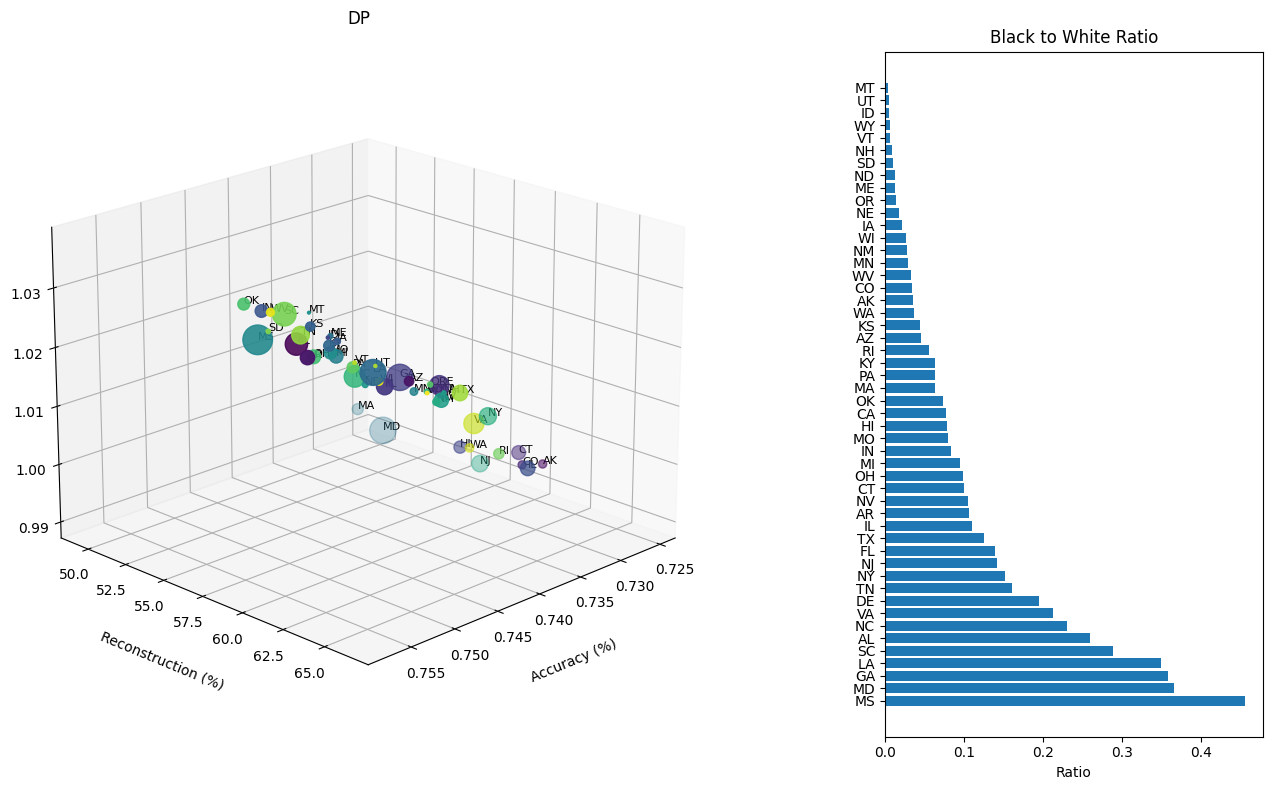

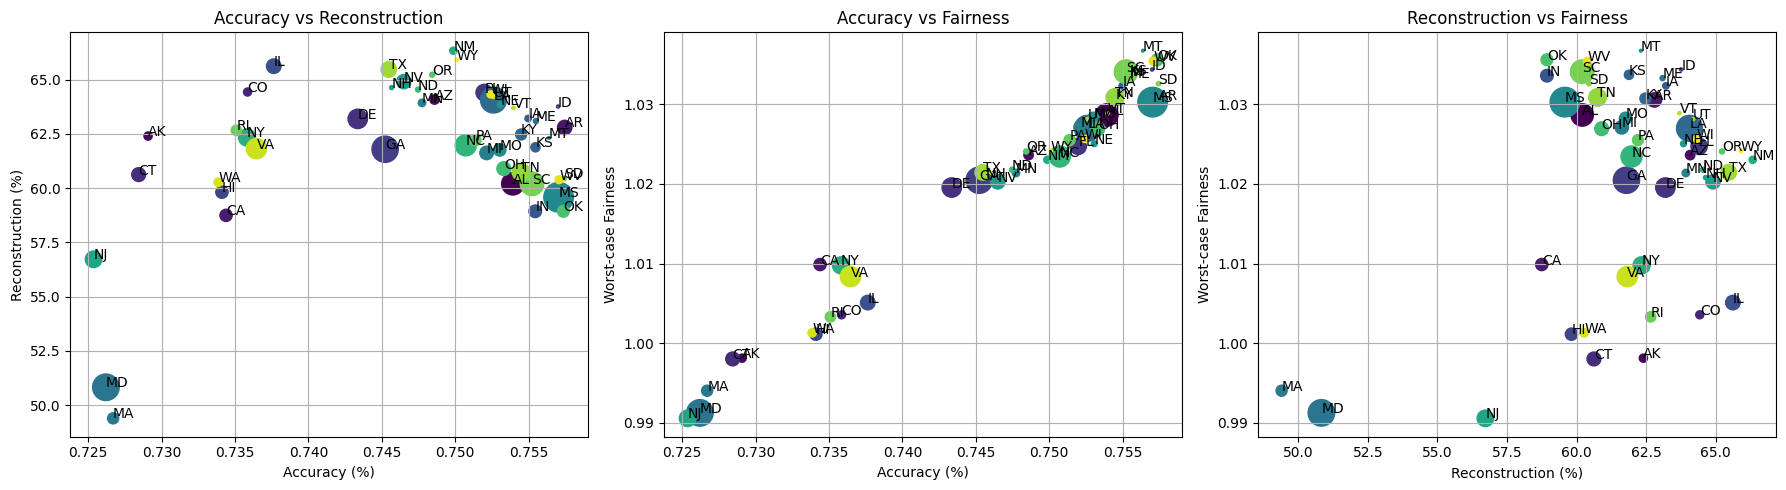

NameError: name 'np' is not defined

In [41]:
multi_objective_analysis(all_state_dp_acc, 
                        worst_case_fairness_dp, 
                        all_state_recon_dp,
                        data_dict)

/tmp/ipykernel_3578585/1225009949.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


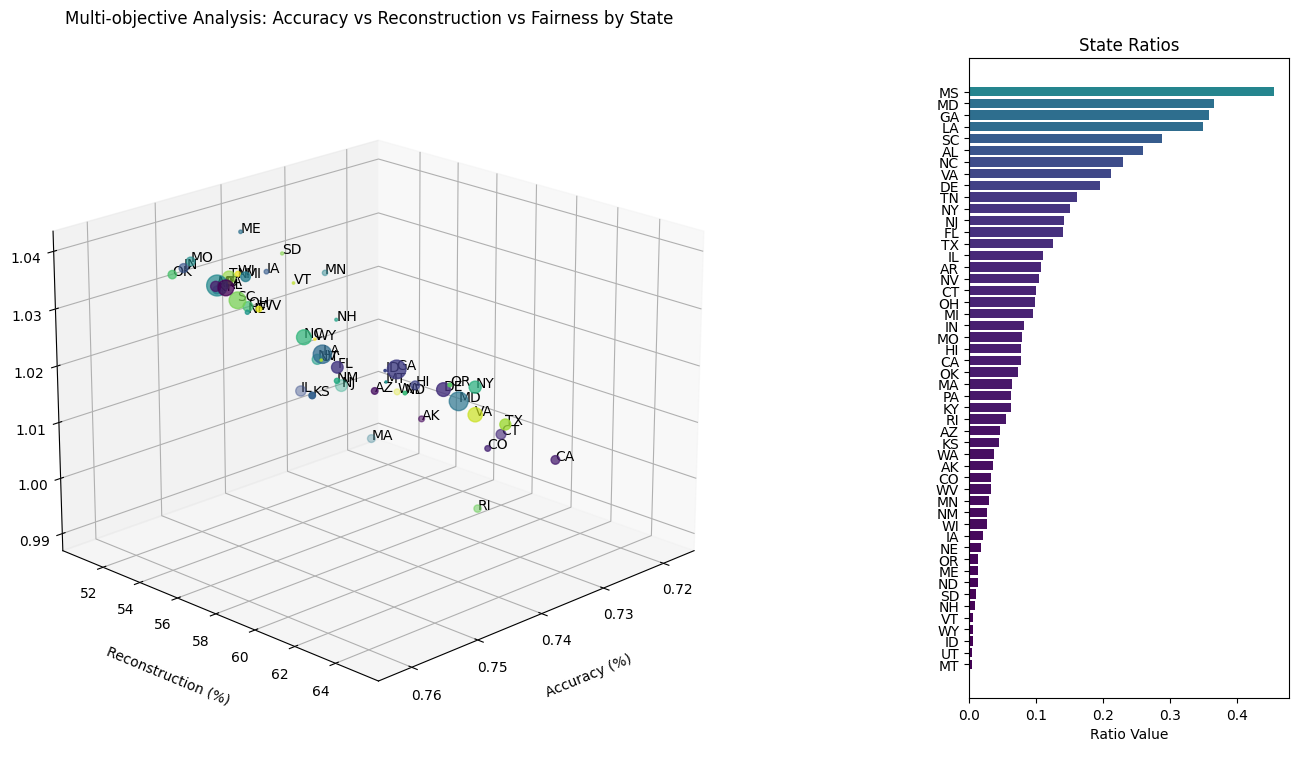

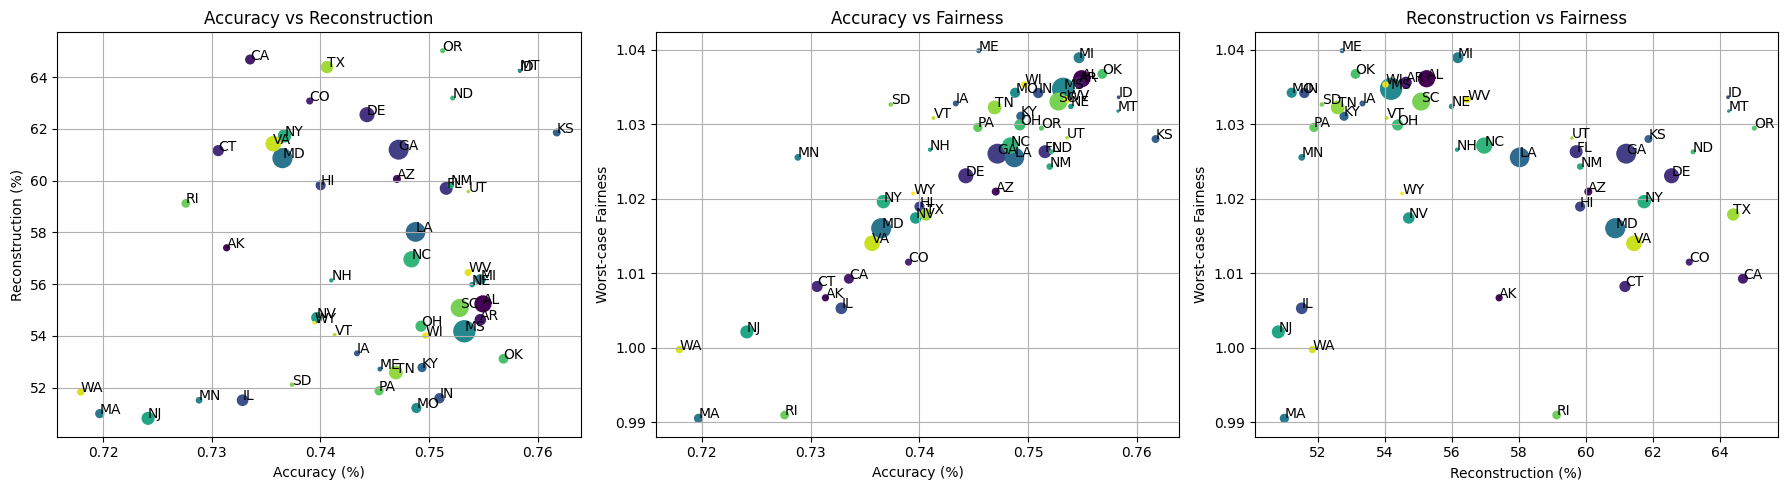


Pareto Optimal Solutions:
State: AK
Accuracy: 0.73
Reconstruction: 57.40
Fairness: 1.00668

State: AZ
Accuracy: 0.75
Reconstruction: 60.07
Fairness: 1.02094

State: CA
Accuracy: 0.73
Reconstruction: 64.69
Fairness: 1.00925

State: CO
Accuracy: 0.74
Reconstruction: 63.08
Fairness: 1.01147

State: CT
Accuracy: 0.73
Reconstruction: 61.16
Fairness: 1.00820

State: DE
Accuracy: 0.74
Reconstruction: 62.55
Fairness: 1.02307

State: GA
Accuracy: 0.75
Reconstruction: 61.20
Fairness: 1.02603

State: ID
Accuracy: 0.76
Reconstruction: 64.24
Fairness: 1.03361

State: IL
Accuracy: 0.73
Reconstruction: 51.51
Fairness: 1.00527

State: KS
Accuracy: 0.76
Reconstruction: 61.86
Fairness: 1.02800

State: MA
Accuracy: 0.72
Reconstruction: 50.99
Fairness: 0.99049

State: MT
Accuracy: 0.76
Reconstruction: 64.26
Fairness: 1.03175

State: NV
Accuracy: 0.74
Reconstruction: 54.70
Fairness: 1.01740

State: NM
Accuracy: 0.75
Reconstruction: 59.83
Fairness: 1.02430

State: ND
Accuracy: 0.75
Reconstruction: 63.20
Fa

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Multi-objective analysis function using provided dictionaries
def multi_objective_analysis(all_state_fair_normal, worst_case_fairness_normal, all_state_recon_normal, ratios):
    
    # Extract state names from keys
    states = list(all_state_fair_normal.keys())
    
    # Extract accuracy, fairness, and reconstruction values
    accuracy_values = list(all_state_fair_normal.values())
    fairness_values = list(worst_case_fairness_normal.values())
    reconstruction_values = list(all_state_recon_normal.values())
    
    # Get the size of markers based on ratios and scale them for visualization
    size_values = [ratios[state] * 500 for state in states]  # Adjust multiplier as needed for optimal visibility

    # Sort states by ratios for sidebar display
    sorted_ratios = sorted(ratios.items(), key=lambda x: -x[1])
    sorted_states = [item[0] for item in sorted_ratios]
    sorted_ratio_values = [item[1] for item in sorted_ratios]

    # Create a figure with a sidebar
    fig = plt.figure(figsize=(16, 8))

    # Sidebar for state ratios with visual bars
    ax_sidebar = fig.add_axes([0.75, 0.1, 0.2, 0.8])  # Position the sidebar to the right
    ax_sidebar.barh(sorted_states, sorted_ratio_values, color=plt.cm.viridis(sorted_ratio_values))
    ax_sidebar.set_xlabel("Ratio Value")
    ax_sidebar.set_title("State Ratios")
    ax_sidebar.invert_yaxis()  # Invert y-axis to match descending order

    # Main 3D plot
    ax_main = fig.add_subplot(111, projection='3d', position=[0.05, 0.1, 0.65, 0.8])

    # Create scatter plot with variable sizes
    scatter = ax_main.scatter(accuracy_values, reconstruction_values, fairness_values,
                              c=range(len(states)), cmap='viridis', s=size_values)

    # Add labels for each point
    for i, state in enumerate(states):
        ax_main.text(accuracy_values[i], reconstruction_values[i], fairness_values[i], 
                     state, size=10, zorder=1, color='black')

    # Set labels and title with padding for better alignment
    ax_main.set_xlabel('Accuracy (%)', labelpad=15)
    ax_main.set_ylabel('Reconstruction (%)', labelpad=15)
    ax_main.set_zlabel('Worst-case Fairness', labelpad=15)
    plt.title('Multi-objective Analysis: Accuracy vs Reconstruction vs Fairness by State', pad=20)

    # Adjust the view
    ax_main.view_init(elev=20, azim=45)
    ax_main.grid(True)
    plt.tight_layout(rect=[0, 0, 0.75, 1])
    plt.show()

    # Create 2D plots for each pair of objectives
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Accuracy vs Reconstruction
    ax1.scatter(accuracy_values, reconstruction_values, c=range(len(states)), cmap='viridis', s=size_values)
    for i, state in enumerate(states):
        ax1.annotate(state, (accuracy_values[i], reconstruction_values[i]))
    ax1.set_xlabel('Accuracy (%)')
    ax1.set_ylabel('Reconstruction (%)')
    ax1.set_title('Accuracy vs Reconstruction')
    ax1.grid(True)

    # Accuracy vs Fairness
    ax2.scatter(accuracy_values, fairness_values, c=range(len(states)), cmap='viridis', s=size_values)
    for i, state in enumerate(states):
        ax2.annotate(state, (accuracy_values[i], fairness_values[i]))
    ax2.set_xlabel('Accuracy (%)')
    ax2.set_ylabel('Worst-case Fairness')
    ax2.set_title('Accuracy vs Fairness')
    ax2.grid(True)

    # Reconstruction vs Fairness
    ax3.scatter(reconstruction_values, fairness_values, c=range(len(states)), cmap='viridis', s=size_values)
    for i, state in enumerate(states):
        ax3.annotate(state, (reconstruction_values[i], fairness_values[i]))
    ax3.set_xlabel('Reconstruction (%)')
    ax3.set_ylabel('Worst-case Fairness')
    ax3.set_title('Reconstruction vs Fairness')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

    # Calculate Pareto front
    def is_pareto_efficient(costs):
        is_efficient = np.ones(costs.shape[0], dtype=bool)
        for i, c in enumerate(costs):
            if is_efficient[i]:
                is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)
                is_efficient[i] = True
        return is_efficient

    # Prepare data for Pareto analysis
    costs = np.column_stack([-np.array(accuracy_values), 
                             -np.array(reconstruction_values), 
                             fairness_values])

    pareto_mask = is_pareto_efficient(costs)

    print("\nPareto Optimal Solutions:")
    for i, is_efficient in enumerate(pareto_mask):
        if is_efficient:
            print(f"State: {states[i]}")
            print(f"Accuracy: {accuracy_values[i]:.2f}")
            print(f"Reconstruction: {reconstruction_values[i]:.2f}")
            print(f"Fairness: {fairness_values[i]:.5f}")
            print()


# Usage with your provided data dictionaries and ratios
multi_objective_analysis(all_state_fair_normal=all_state_fairdp_acc, 
                         worst_case_fairness_normal=worst_case_fairness_fairdp, 
                         all_state_recon_normal=all_state_recon_fairdp,
                         ratios=data_dict)
